# DAEN 690 Capstone Project

## Import Libraries

In [206]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
import numpy as np

## Importing Dataset, Creating DataFrame, and Standardizing Data

### Import Dataset

In [207]:
#load Dataset
#Example input for file name is USM00072712-data.txt
file = input("Please enter file name: ")
#Entering in the city name will be used for the plots in the EDA section
city = input("Please input the station's city name: ")
df = pd.read_csv(file, sep = '\t', header = None)

Please enter file name: USM00072712-data.txt
Please input the station's city name: Caribou, Maine


In [208]:
#Raw Text File
df

,0
0,#USM00072712 2021 01 01 00 2303 178 ncdc-nws ...
1,21 0 99364B 191 -32B 680 51 295 ...
2,20 8 98805 236B -31B 594 68 296 ...
3,20 46 96285 440B -45B 612 63 296 ...
4,10 154 92500 754B -73B 663 52 298 ...
...,...
395232,20 9925 1210 29467B -559B 30 239 58 ...
395233,20 9938 1194 29553B -557B 29 241 54 ...
395234,20 9945 1186 29596B -556B 30 241 51 ...
395235,20 9952 1177 29643B -555B 30 240 58 ...


In [209]:
#This saves the id_number to be used in the standardize_dataset function
id_number = file.split('-')[0]

In [210]:
#This function helps to standardize the dataset using the following steps:
#1. Parsing the text file
#2. Assiging the parsed text to columns in our DataFrame
#3. Combining the header records and data records
#4. Dropping any null rows
#5. Assigning the correct data types to our columns
#6. Returning the standardized DataFrame
def standardize_dataset(id_number, df):
    id_ = []
    year = []
    month = []
    day = []
    hour =[]
    reltime = []
    numlev = []
    p_src = []
    np_src = []
    lat = []
    lon = []

    lvltyp1 = []
    lvltyp2 = []
    etime = []
    press = []
    pflag = []
    gph = []
    zflag = []
    temp = []
    tflag = []
    rh = []
    dpdp = []
    wdir = []
    wspd = []

    for line in df[0]:
        if id_number in line:
            id_.append(line[0:12].strip())
            year.append(line[13:17].strip())
            month.append(line[17:20].strip())
            day.append(line[20:23])
            hour.append(line[23:26])
            reltime.append(line[27:31])
            numlev.append(line[33:36])
            p_src.append(line[37:45])
            np_src.append(line[46:54])
            lat.append(line[56:62])
            lon.append(line[64:71])
            lvltyp1.append(None)
            lvltyp2.append(None)
            etime.append(None)
            press.append(None)
            pflag.append(None)
            gph.append(None)
            zflag.append(None)
            temp.append(None)
            tflag.append(None)
            rh.append(None)
            dpdp.append(None)
            wdir.append(None)
            wspd.append(None)
        else:
            id_.append(None)
            year.append(None)
            month.append(None)
            day.append(None)
            hour.append(None)
            reltime.append(None)
            numlev.append(None)
            p_src.append(None)
            np_src.append(None)
            lat.append(None)
            lon.append(None)
            lvltyp1.append(line[0:1].strip())
            lvltyp2.append(line[1:2].strip())
            etime.append(line[4:8].strip())
            press.append(line[9:15].strip())
            pflag.append(line[15:16].strip())
            gph.append(line[16:21].strip())
            zflag.append(line[21:22].strip())
            temp.append(line[22:27].strip())
            tflag.append(line[27:28].strip())
            rh.append(line[28:33].strip())
            dpdp.append(line[33:39].strip())
            wdir.append(line[40:45].strip())
            wspd.append(line[46:51].strip())
    
    df = pd.DataFrame({
        'id_': id_,
        'year': year,
        'month': month,
        'day': day,
        'hour': hour,
        'reltime': reltime,
        'numlev': numlev,
        'p_src': p_src,
        'np_src': np_src,
        'lat': lat,
        'lon': lon,
        'lvltyp1': lvltyp1,
        'lvltyp2': lvltyp2,
        'etime': etime,
        'press': press,
        'pflag': pflag,
        'gph': gph,
        'zflag': zflag,
        'temp': temp,
        'tflag': tflag,
        'rh': rh,
        'dpdp': dpdp,
        'wdir': wdir,
        'wspd': wspd})
    
    df['id_'].fillna(method = 'ffill', inplace = True)
    df['year'].fillna(method = 'ffill', inplace = True)
    df['month'].fillna(method = 'ffill', inplace = True)
    df['day'].fillna(method = 'ffill', inplace = True)
    df['hour'].fillna(method = 'ffill', inplace = True)
    df['reltime'].fillna(method = 'ffill', inplace = True)
    df['numlev'].fillna(method = 'ffill', inplace = True)
    df['p_src'].fillna(method = 'ffill', inplace = True)
    df['np_src'].fillna(method = 'ffill', inplace = True)
    df['lat'].fillna(method = 'ffill', inplace = True)
    df['lon'].fillna(method = 'ffill', inplace = True)
    
    df = df.dropna()
    
    df['id_'] = df['id_'].astype(str)
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    df['day'] = df['day'].astype(int)    
    df['hour'] = df['hour'].astype(int)
    df['reltime'] = df['reltime'].astype(int)
    df['numlev'] = df['numlev'].astype(int)
    df['p_src'] = df['p_src'].astype(str)
    df['np_src'] = df['np_src'].astype(str)
    df['lat'] = df['lat'].astype(int)
    df['lon'] = df['lon'].astype(int)
    df['lvltyp1'] = df['lvltyp1'].astype(int)
    df['lvltyp2'] = df['lvltyp2'].astype(int)
    df['etime'] = df['etime'].astype(int)
    df['press'] = df['press'].astype(int)
    df['pflag'] = df['pflag'].astype(str)
    df['gph'] = df['gph'].astype(int)
    df['zflag'] = df['zflag'].astype(str)
    df['temp'] = df['temp'].astype(int)
    df['tflag'] = df['tflag'].astype(str)
    df['rh'] = df['rh'].astype(int)
    df['dpdp'] = df['dpdp'].astype(int)
    df['wdir'] = df['wdir'].astype(int)
    df['wspd'] = df['wspd'].astype(int)
    
    return df

In [211]:
#Standardized DataFrame
print(city)
df_std = standardize_dataset(id_number, df)
df_std

Caribou, Maine


,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,press,pflag,gph,zflag,temp,tflag,rh,dpdp,wdir,wspd
1,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,99364,B,191,,-32,B,680,51,295,36
2,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,98805,,236,B,-31,B,594,68,296,47
3,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,96285,,440,B,-45,B,612,63,296,96
4,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,92500,,754,B,-73,B,663,52,298,127
5,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,91875,,807,B,-78,B,676,49,299,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395232,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,1210,,29467,B,-559,B,30,239,58,77
395233,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,1194,,29553,B,-557,B,29,241,54,72
395234,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,1186,,29596,B,-556,B,30,241,51,69
395235,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,1177,,29643,B,-555,B,30,240,58,64


## Functions

### Relative Humidity to Ice

Relative Humidity to Ice Equation
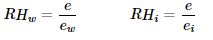
Saturation Water Vapor Pressure
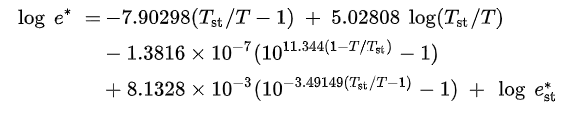
Saturation Water Vapor Pressure Over Ice
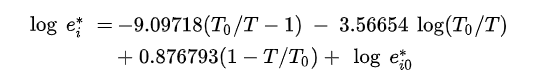

In [212]:
#Calculating Relative Humidity to Ice Steps
#1. Create an empty array to store the rh_ice values
#2. If not a null value proceed
#3. Standardize relative humidity to a decimal value
#4. Calculate saturation water vapor pressure
#5. Calculate saturation water vapor pressure over ice
#6.Calculate actual vapor pressure
#7. Calculate relative humidity to ice
#8. Return relative humidity to ice values

def relative_humidity_to_ice(temp_k, rh_w):
    
    # Initialize an empty array to store all calculations to be returned
    rh_ice = np.empty(len(temp_k))
    
    # Create a condition that if the value is not one of the following, the value is saved
    condition = (temp_k != -9999) & (temp_k != -8888) & (rh_w != -9999) & (rh_w != -8888)

    # Calculate rh_ice for non-null values
    t_non_null = temp_k[condition]
    #We divide first by 10 to standardize relative humidity (rh) to a percentage (ex: 11 = 1.1%). 
    #We than convert the percentage into a decimal value by dividing by 100. 
    rh_w_non_null = (rh_w[condition] / 10) / 100  
    
    # Ensure temperature is a non-zero number so we do not divide by 0. 
    t = t_non_null[t_non_null != 0]
    
    #Values needed for Goff-Gratch Equation
    t_st = 373.13 #steam-point temperature
    e_st = 1013.25 #steam-point pressure
    to = 273.16 #ice-point (triple point) temperature
    e_i0 = 6.1173 #ice-point pressure
    
    #Calculate log_ew (Saturation Water Vapor Pressure)
    log_ew = -7.90298 * (t_st / t - 1) + 5.02808 * np.log10(t_st / t) \
             - 1.3816e-7 * (10**(11.344 * (1 - t / t_st)) - 1) \
             + 8.1328e-3 * (10**(-3.49149 * (t_st / t - 1)) - 1) + np.log10(e_st)
    ew = np.exp(log_ew)
    
    #Calculate log_ei (Saturation Water Vapor Pressure Over Ice)
    log_ei = -9.09718 * (to / t - 1) - 3.56654 * np.log10(to / t) + 0.876793 * (1 - t / to) \
             + np.log10(e_i0)
    ei = np.exp(log_ei)

    #Calculate actual vapor pressure
    e_press = rh_w_non_null * ew
    
    #Calculcate relative humidity to ice
    rh_ice[condition] = e_press / ei
    
    #If value was -9999 or -8888, assigning -9999 value
    #~ denotes when the condition above is false and assigns them with -9999
    rh_ice[~condition] = -9999
    
    #Return all values calculated
    return rh_ice

### Capture When Temp below -42 Fahrenheit, RH above 100%, and pressure altitude below 43,000 feet

In [213]:
#Function for ISSR
def issr(temp_f, rhi, press_alt):
    result = pd.Series('no', index = temp_f.index)
    
    result[(temp_f < -42) & (rhi > 1) & (press_alt < 43000)] = 'yes'
    
    return result

## Adding Conversions to DataFrames

### Filter to 2010-2024

In [214]:
#Filtering dataset to 2010-2024 data to reduce need to add conversions to entire dataset
df_std = df_std[(df_std['year'] >= 2010) & (df_std['year'] <= 2024)]

### Adding Conversions to DataFrame

In [215]:
#Fahrenheit - Applying Pandas Vectorization
warnings.filterwarnings("ignore")
condition = (df_std['temp'] != -9999) & (df_std['temp'] != -8888)
df_std['temp_f'] = df_std['temp']
df_std.loc[condition, 'temp_f'] = df_std.loc[condition, 'temp_f'] /10 * (9/5) + 32

In [216]:
#Kelvins - Applying Pandas Vectorization
warnings.filterwarnings("ignore")
condition2 = (df_std['temp'] != -9999) & (df_std['temp'] != -8888)
df_std['temp_k'] = df_std['temp']
df_std.loc[condition2, 'temp_k'] = df_std.loc[condition2, 'temp_k'] / 10 + 273.15

In [217]:
#Pressure Altitude - Applying Pandas Vectorization
warnings.filterwarnings("ignore")
condition3 = (df_std['press'] != -9999) & (df_std['press'] != -8888)
df_std['press_alt'] = df_std['press'] / 100
df_std.loc[condition3, 'press_alt'] = round(((1 - (df_std.loc[condition3, 'press_alt'] / 1013.25) ** 0.190284) \
                                                * 145366.45), 2)

In [218]:
#Relative Humidity to Ice - References Function
warnings.filterwarnings("ignore")
df_std['rh_ice'] = relative_humidity_to_ice(df_std['temp_k'], df_std['rh'])
df_std['rh_ice'] = df_std['rh_ice'].round(3)

In [219]:
#ISSC - References Function
warnings.filterwarnings("ignore")
df_std['issc'] = issr(df_std['temp_f'], df_std['rh_ice'], df_std['press_alt'])

In [220]:
#DataFrame with new added conversion columns
print(city)
df_std

Caribou, Maine


,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
1,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,B,680,51,295,36,26.24,269.95,539.58,0.689,no
2,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,B,594,68,296,47,26.42,270.05,694.97,0.602,no
3,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,B,612,63,296,96,23.90,268.65,1404.45,0.624,no
4,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,B,663,52,298,127,18.86,265.85,2498.86,0.684,no
5,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,B,676,49,299,124,17.96,265.35,2683.05,0.699,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395232,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,B,30,239,58,77,-68.62,217.25,82768.35,0.038,no
395233,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,B,29,241,54,72,-68.26,217.45,82926.71,0.036,no
395234,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,B,30,241,51,69,-68.08,217.55,83006.53,0.038,no
395235,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,B,30,240,58,64,-67.90,217.65,83096.86,0.038,no


## Filter Dataset (Data from 2023 AND Pressure Altitude Under 43,000)

In [221]:
#Filter and create new DataFrame. New U.S. DataFrame is all data that is in the year 2023 and 
#pressure altitude is under 4,300 ft.
df_clean = df_std[(df_std['year'] == 2023) & (df_std['press_alt'] <= 43000)]

## Finalized Cleaned Datasets for Analysis

In [222]:
#Final Clean Dataset that can be exported to csv, run basic statistics, and plot EDA. 
print(city)
df_clean

Caribou, Maine


,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
240922,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,970,4,6,26,40.46,277.85,999.75,0.951,no
240923,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,927,11,49,83,40.82,278.05,1499.89,0.908,no
240924,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,963,5,52,83,41.36,278.35,1580.73,0.942,no
240925,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,1000,0,60,82,41.36,278.35,1819.52,0.978,no
240926,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,968,5,76,57,40.46,277.85,2374.19,0.949,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375855,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,75,21,-9999.00,-9999.00,-99.99,-9999.000,no
375856,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,90,41,-9999.00,-9999.00,-99.99,-9999.000,no
375857,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,100,31,-9999.00,-9999.00,-99.99,-9999.000,no
375858,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,45,15,-9999.00,-9999.00,-99.99,-9999.000,no


## Basic Statistics for Dataset

In [223]:
num_rows = len(df_clean)
null_rows = ((df_clean['rh_ice'].isin([-9999, -8888])) |
                                  (df_clean['temp'].isin([-9999, -8888])) |
                                  (df_clean['press'].isin([-9999, -8888]))).sum()
null_rows_percent = (null_rows / len(df_clean)) * 100
issr_count = len(df_clean[df_clean['issc'] == 'yes'])

#Number of null rows means that if a row had -8888 or -9999 values for rh_ice, temp, or pressure
print(f"Dataset Statistics for {city}:")
print("")
print("Number of rows in 2023 data:", num_rows)
print("Number of null rows: ", null_rows)
print("Percent of null rows: ", round(null_rows_percent, 2), "%")
print("Number of rows that meet ISS conditions: ", issr_count)

Dataset Statistics for Caribou, Maine:

Number of rows in 2023 data: 74325
Number of null rows:  33267
Percent of null rows:  44.76 %
Number of rows that meet ISS conditions:  89


## ISS Conditions Exploratory Data Analysis

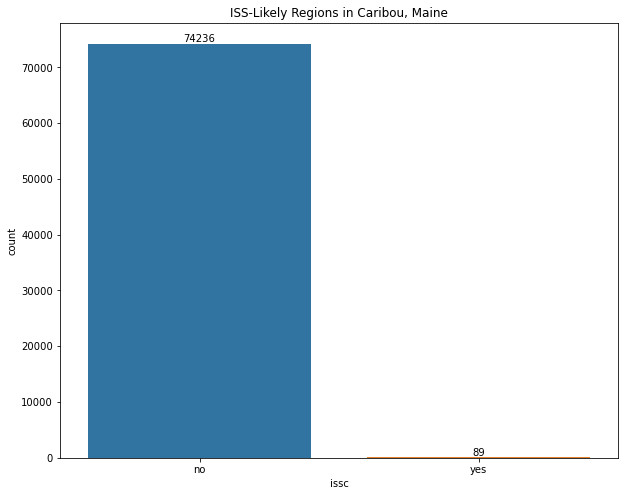

In [224]:
plt.figure(figsize = (10, 8))

ax = sns.countplot(x = 'issc', data = df_clean)
ax.set(title = f'ISS-Likely Regions in {city}')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
           f'{int(p.get_height())}', ha = 'center', va = 'bottom')

#plt.savefig(f'{city}_issr_percent.png')

### ISS Conditions were present in the region X% of days a month

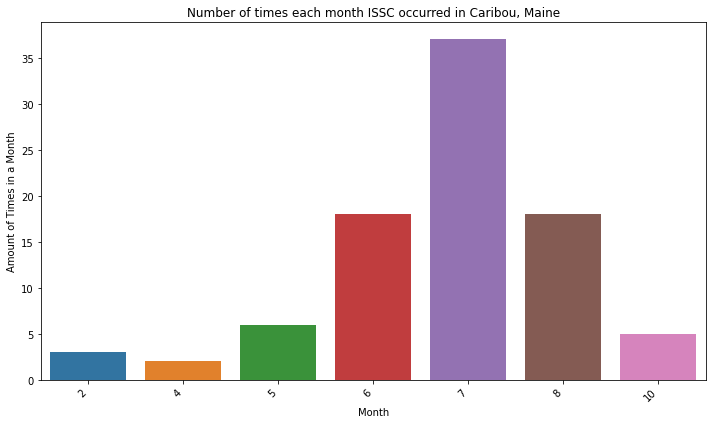

In [225]:
#Capture all days ISSC occurred
issc_yes = df_clean[df_clean['issc'] == "yes"]

#Groupby Month
df_counts = issc_yes.groupby('month').size()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x = df_counts.index, y = df_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title(f'Number of times each month ISSC occurred in {city}')
plt.xlabel('Month')
plt.ylabel('Amount of Times in a Month')
plt.tight_layout()

#plt.savefig(f'{city}_times_a_month.png')
plt.show()

## Export to CSV

In [226]:
#df_clean.to_csv(f'{city}_issr2023.csv', index = False)